In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import joblib

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the training csv into a panda dataset.

In [2]:
steel_plate_dataset = pd.read_csv('kaggle/input/playground-series-s4e3/train.csv')

# Overview

In [3]:
steel_plate_dataset.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
steel_plate_dataset.tail()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1
19218,19218,1505,1525,1733458,1733471,182,24,33,22785,98,...,0.5263,-0.1120,0.6619,0,0,0,0,0,1,0


# Data Visualization

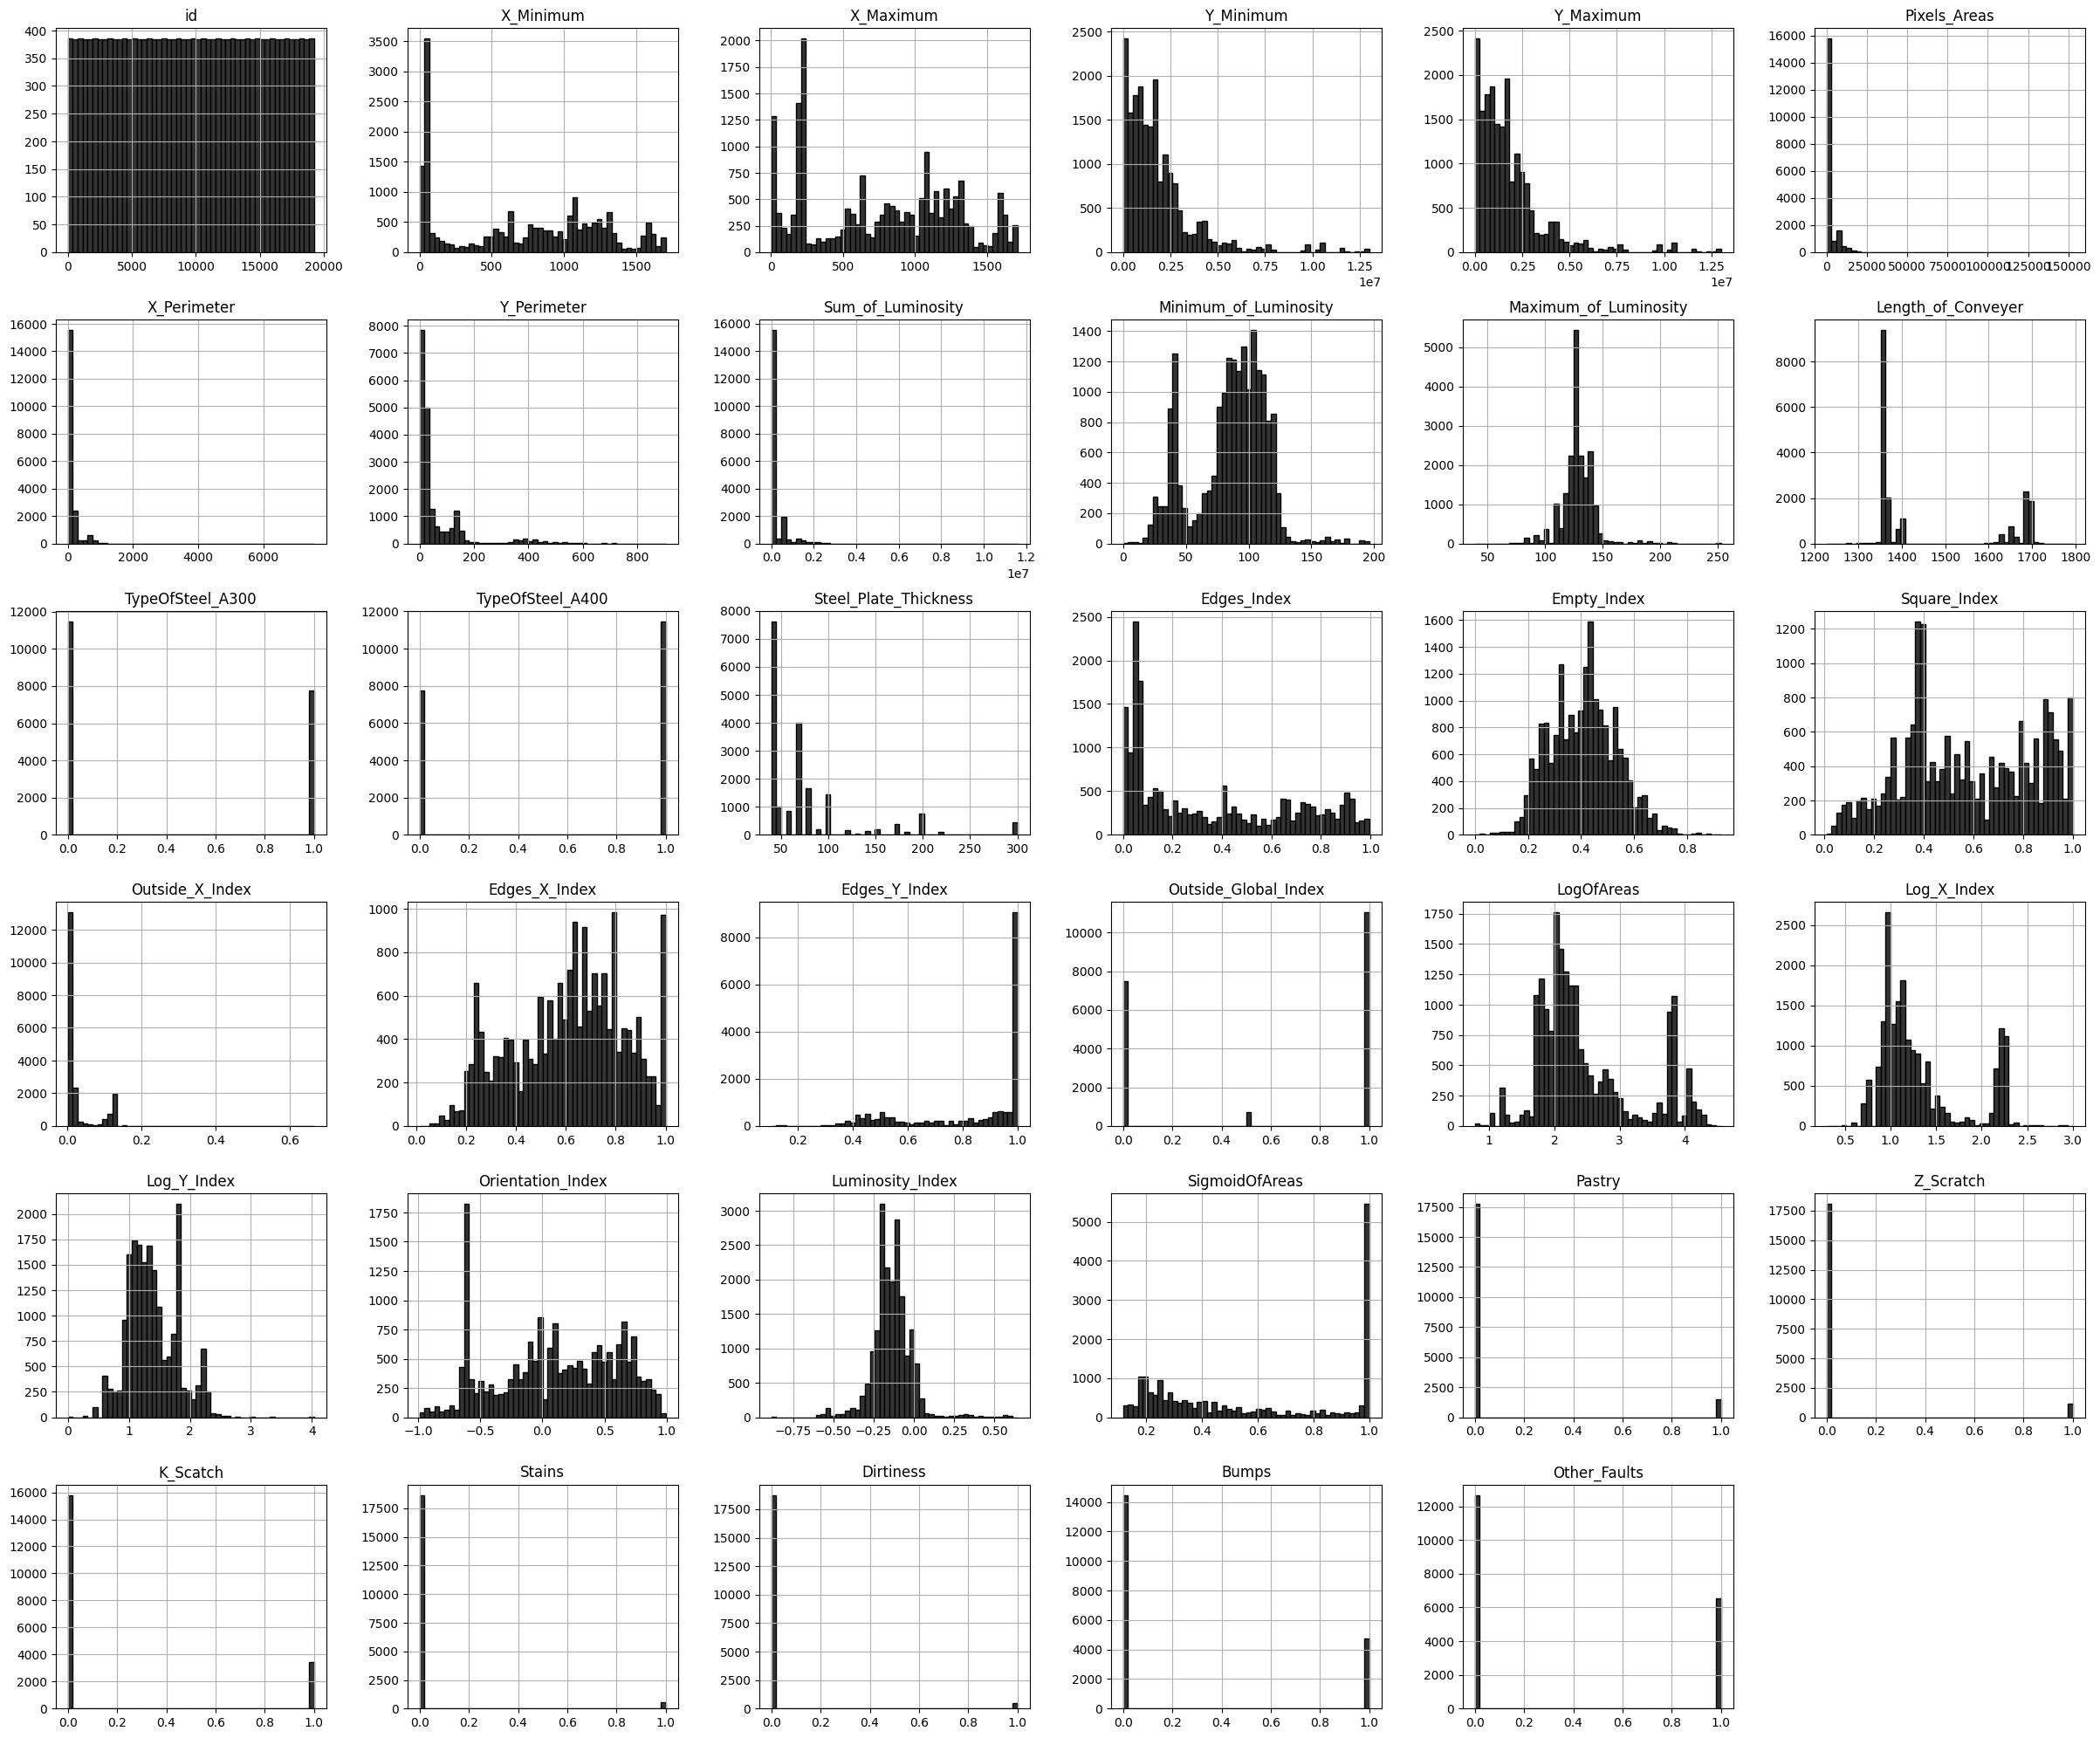

In [5]:
%matplotlib inline

steel_plate_dataset.hist(bins=50,figsize=(30,25),color=(.2,.2,.2),edgecolor=(0,0,0))
plt.show()

# Correlation

<Axes: >

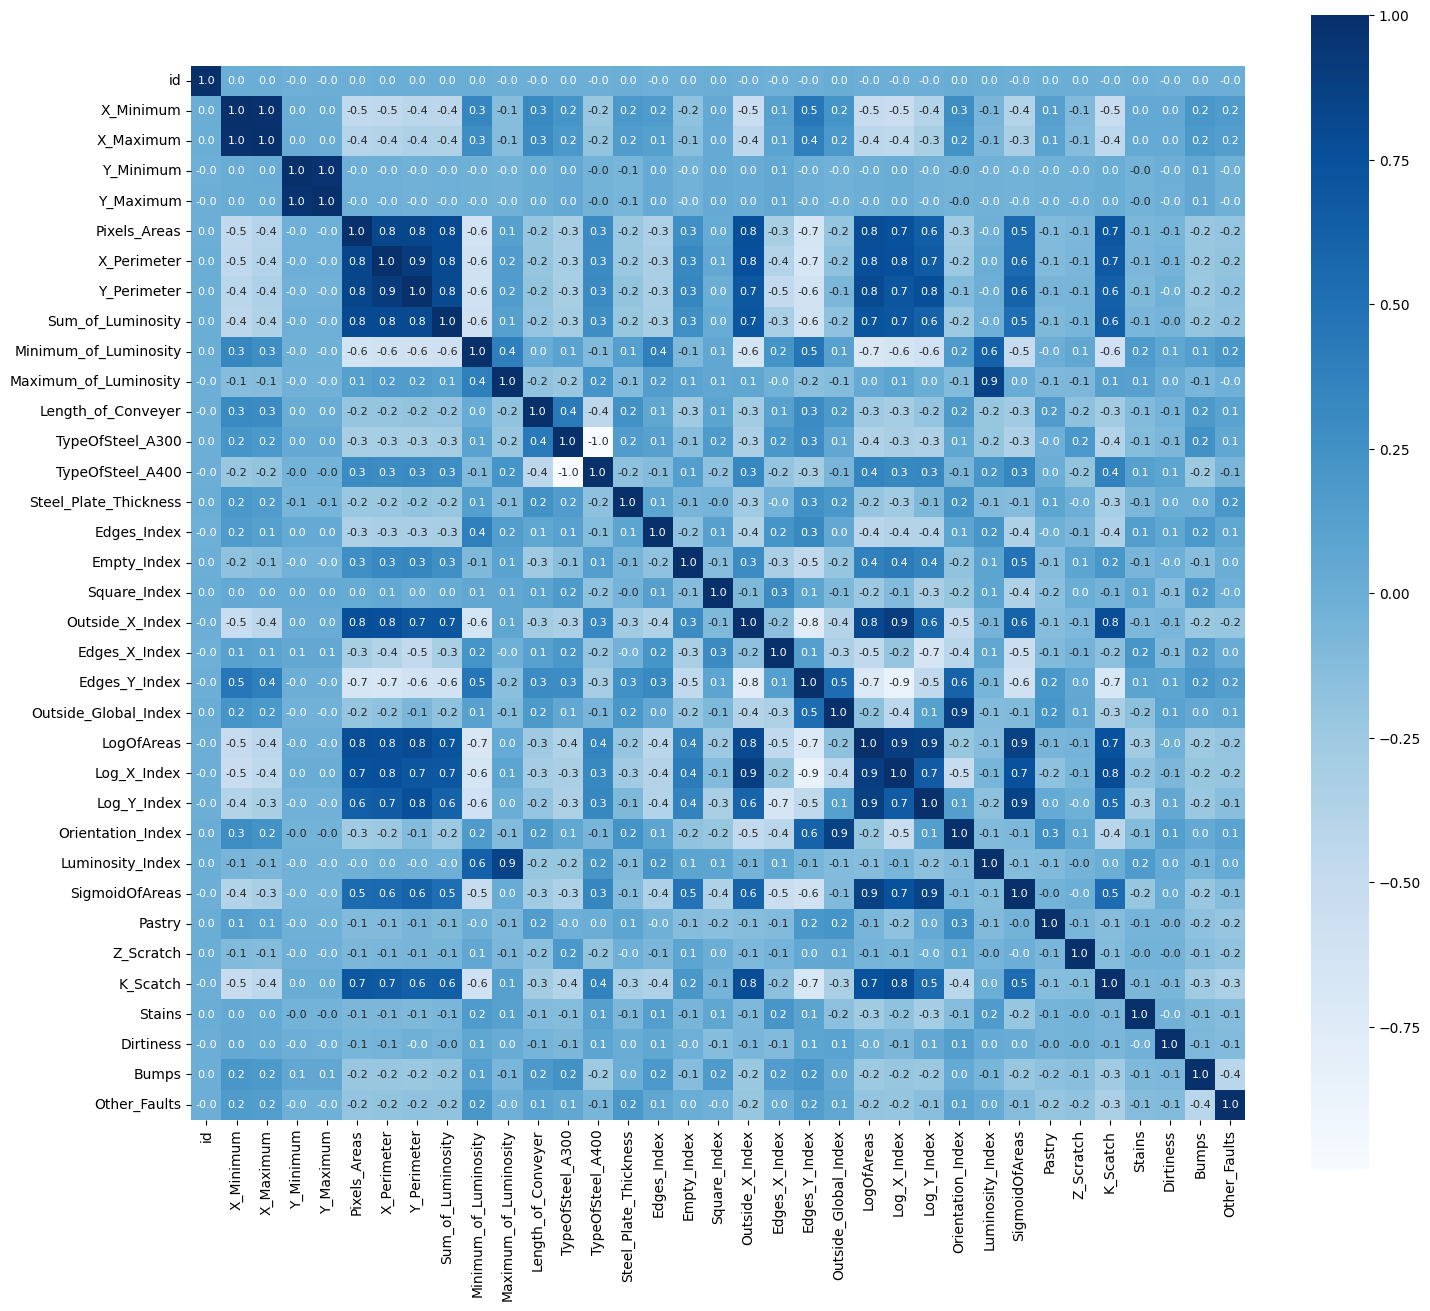

In [6]:
# Analysing correlation using a heatmap

correlation = steel_plate_dataset.corr()
plt.figure(figsize=(17,15))

sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

# Exploratory Data Analysis (EDA)

## Checking for null values

In [7]:
steel_plate_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

- This dataset doesn't have any null values

## 1. Detect Outliers

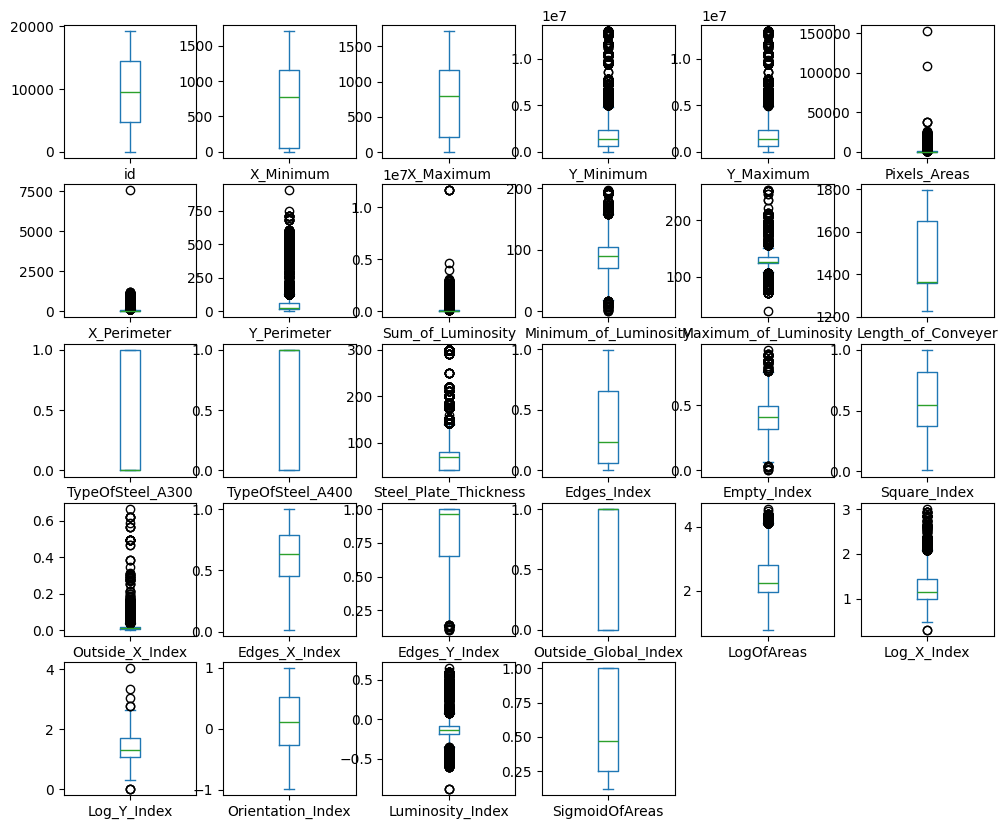

In [8]:
features = steel_plate_dataset.columns[:-7]
steel_plate_dataset[features].plot(kind='box', subplots=True, layout=(5,6), figsize=(12,10))
plt.show()

- In the above data we can see Pixel_Areas and X_perimeter have outlier gaps.

## 2. Check data balance

In [9]:
steel_plate_dataset.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- From the above statistics, we note that Pastry Z_Scratch K_Scatch Stains Dirtiness have very less mean compared to Bumps, Other_Faults.
- We need to balance these classes to fix this issue.

# Data Preprocessing

## 1. Remove outliers

<Axes: >

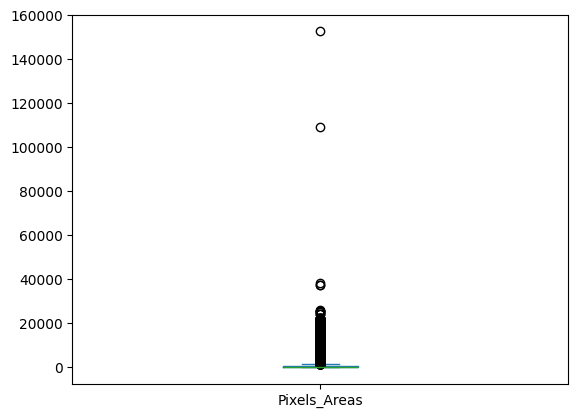

In [10]:
steel_plate_dataset['Pixels_Areas'].plot(kind='box')

<Axes: >

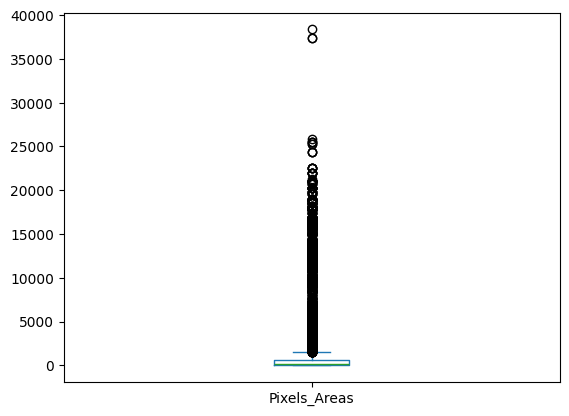

In [11]:
# Pixels_Areas has a big outlier that might skew results.
steel_plate_dataset = steel_plate_dataset[steel_plate_dataset['Pixels_Areas']<40000]
# Verifying filtering of Pixels_Areas.
steel_plate_dataset['Pixels_Areas'].plot(kind='box')

<Axes: >

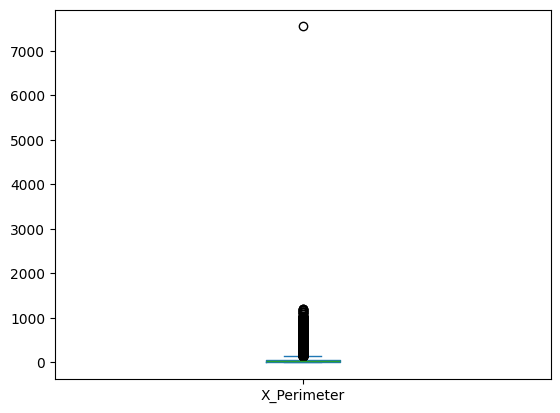

In [12]:
steel_plate_dataset['X_Perimeter'].plot(kind='box')

<Axes: >

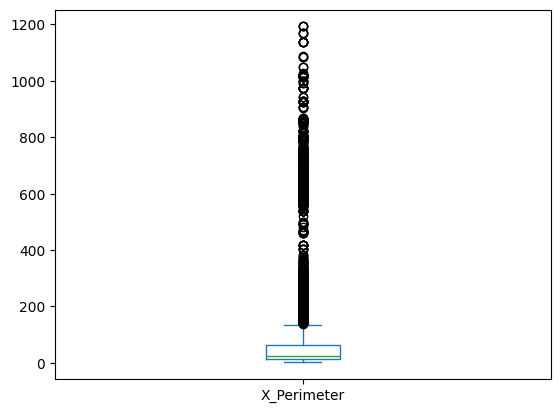

In [13]:
# X_Perimeter has a big outlier that might skew results.
steel_plate_dataset = steel_plate_dataset[steel_plate_dataset['X_Perimeter']<2000]
# Verifying filtering of Pixels_Areas.
steel_plate_dataset['X_Perimeter'].plot(kind='box')

## 2. Balancing data

In [14]:
X = steel_plate_dataset.drop(columns=['id', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])
y = steel_plate_dataset[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']]

defaults = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
encoded_data = np.array(y)
max_indices = encoded_data.argmax(axis=1)
y = pd.DataFrame(data =[defaults[ind] for ind in max_indices], columns=[''])

# Perform oversampling to balance the dataset
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [15]:
print(y_resampled.value_counts())
print(X_resampled.shape)
print(y_resampled.shape)

            
Bumps           6540
Dirtiness       6540
K_Scatch        6540
Other_Faults    6540
Pastry          6540
Stains          6540
Z_Scratch       6540
Name: count, dtype: int64
(45780, 27)
(45780, 1)


## 3. Hot encode categorical values

In [16]:
encoded_data = pd.get_dummies(y_resampled, dtype=int)
encoded_data

,_Bumps,_Dirtiness,_K_Scatch,_Other_Faults,_Pastry,_Stains,_Z_Scratch
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
45775,0,0,0,0,0,0,1
45776,0,0,0,0,0,0,1
45777,0,0,0,0,0,0,1
45778,0,0,0,0,0,0,1


In [17]:
y_resampled = encoded_data

## 4. Splitting the dataset into training, validation, and test sets

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=31)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=31) 

## 5. Scale the features

In [19]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)
Xtest = scaler.transform(Xtest)

# Creating a neural network in Keras

In [20]:
neural_model = Sequential([
    Input(shape=(Xtrain.shape[1],)),  
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),     
    Dense(7, activation='softmax') 
])

# Compile the model
neural_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
result = neural_model.fit(Xtrain, ytrain, epochs=50, validation_data=(Xval, yval), verbose=0,)

# Plot the train and Validation Loss Functions

#### Generating a train and validation loss functions to determine number of epochs and evidence of overfitting.

Text(0.5, 0, 'Epoch')

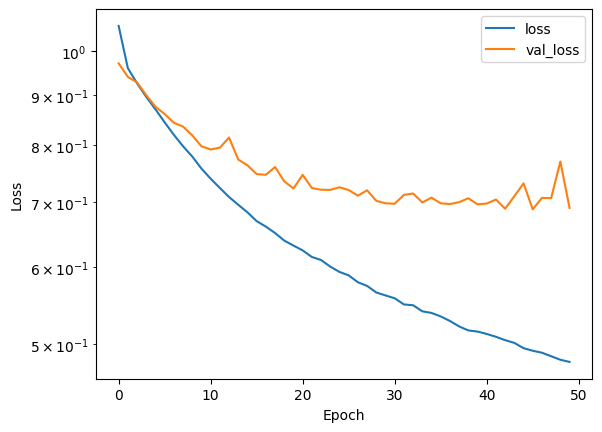

In [21]:
plt.semilogy(result.history['loss'], label='loss')
plt.semilogy(result.history['val_loss'], label='val_loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

- Retained the model with proper number of epochs

# Use the splitted test data set to analyze the model effectiveness

- Generated predicted labels and probabilities of those labels.

In [22]:
# Make predictions and save in dataframe
yp = neural_model.predict(Xtest)
yp = pd.DataFrame(yp,columns=ytest.columns)

# Extract predicted labels and probabilities
predicted_label = yp.idxmax(axis=1)
predicted_prob = yp.max(axis=1)
actual_label = ytest.idxmax(axis=1)

287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step


# Display probabilities

- Display probabilities of faults with the most likely label highlighted and the actual label displayed.(Last 50 rows in test data)

In [23]:
yp['Actual fault'] = actual_label.values
numeric_cols = yp.select_dtypes(include=['number']).columns
highlighted = yp.tail(50).style.highlight_max(axis=1, subset=numeric_cols)
highlighted

,_Bumps,_Dirtiness,_K_Scatch,_Other_Faults,_Pastry,_Stains,_Z_Scratch,Actual fault
9106,0.016372,0.000754,0.297666,0.341187,0.343390,0.000000,0.000631,_K_Scatch
9107,0.000561,0.000000,0.000003,0.012896,0.001027,0.985512,0.000000,_Stains
9108,0.000101,0.971297,0.001284,0.009334,0.017984,0.000000,0.000000,_Dirtiness
9109,0.012247,0.913663,0.000374,0.054559,0.019112,0.000000,0.000045,_Dirtiness
9110,0.664849,0.000042,0.000000,0.082522,0.231279,0.003580,0.017728,_Bumps
9111,0.546550,0.000000,0.000000,0.202574,0.250875,0.000001,0.000000,_Bumps
9112,0.006564,0.000009,0.000000,0.014043,0.008459,0.000000,0.970924,_Z_Scratch
9113,0.206953,0.000000,0.000000,0.529878,0.263169,0.000000,0.000000,_Other_Faults
9114,0.027875,0.000018,0.000000,0.055897,0.096099,0.000000,0.820111,_Z_Scratch
9115,0.292729,0.000000,0.000000,0.113804,0.593466,0.000000,0.000000,_Pastry


# Generating a confusion matrix

<Axes: >

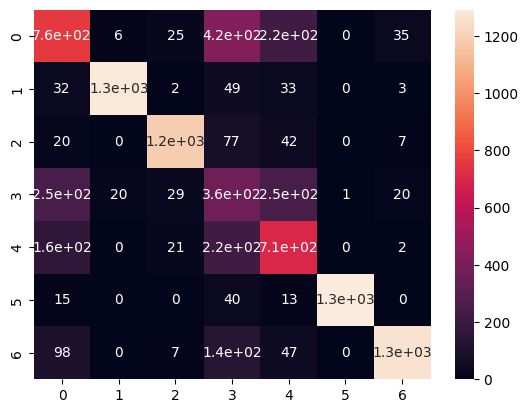

In [24]:
cm = confusion_matrix(predicted_label, actual_label)
sns.heatmap(cm, annot=True)

# Score, Accuracy and Evaluation of Neural Network

In [25]:
score1, acc1 = neural_model.evaluate(Xtrain, ytrain)
score2, acc2 = neural_model.evaluate(Xtest, ytest)

yp_numeric = yp.drop(columns=['Actual fault'])

mse = mean_squared_error(ytest, yp_numeric, multioutput='raw_values')
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, yp_numeric, multioutput='raw_values')

print(f"MSE:\n{mse}")
print(f"RMSE:\n{rmse}")
print(f"MAE:\n{mae}")

916/916 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - accuracy: 0.8227 - loss: 0.4549
287/287 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - accuracy: 0.7448 - loss: 0.7023
MSE:
[0.09039956 0.01189908 0.01969713 0.10986694 0.07850374 0.00635781
 0.02727942]
RMSE:
[0.30066519 0.1090829  0.14034648 0.33146183 0.28018519 0.07973585
 0.16516484]
MAE:
[0.16553945 0.02473092 0.03457817 0.19772004 0.14059706 0.01081868
 0.04918711]


# Scikit Clasifiers

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier

# Create models

In [27]:
ada = AdaBoostClassifier()
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
mlp = MLPClassifier(max_iter=50)
clist = [ada, lr, nb, knn, dt, rf, svc, mlp]
mlist = [None]*8

# Train Models

In [28]:
for i,m in enumerate(clist):
    mlist[i] = MultiOutputClassifier(m).fit(Xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R

# Evaluate classifier models

In [29]:
x = pd.DataFrame()
n = ['Keras/TF NN']; s1 = [score1]; s2 = [score2]
for i,m in enumerate(mlist):
    n.append(str(m.estimator))
    s1.append(m.score(Xtrain, ytrain))
    s2.append(m.score(Xtest, ytest))

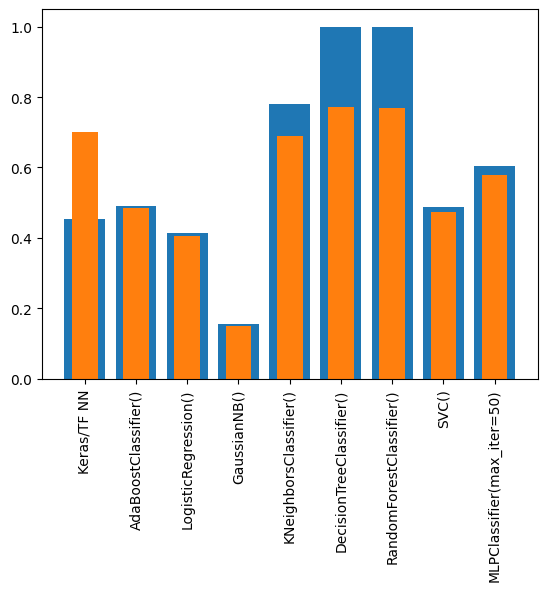

In [30]:
plt.bar(n, s1, label = 'Train')
plt.bar(n, s2, width=0.5, label='Test')
plt.xticks(rotation=90)
plt.legend
plt.show()

In [31]:
for i, m in enumerate(mlist):
    y_pred = m.predict(Xtest)
    
    model_mse = mean_squared_error(ytest, y_pred, multioutput='raw_values')

    model_rmse = np.sqrt(model_mse)

    model_mae = mean_absolute_error(ytest, y_pred, multioutput='raw_values')

    print(f"Model {m.estimator}: \nMSE: \n{model_mse}, \nRMSE: \n{model_rmse}, \nMAE: \n{model_mae}\n")

Model AdaBoostClassifier(): 
MSE: 
[0.14056356 0.08868502 0.02981651 0.14438619 0.14121887 0.02107907
 0.06181739], 
RMSE: 
[0.37491808 0.29780029 0.17267459 0.37998183 0.375791   0.14518634
 0.24863103], 
MAE: 
[0.14056356 0.08868502 0.02981651 0.14438619 0.14121887 0.02107907
 0.06181739]

Model LogisticRegression(): 
MSE: 
[0.14340323 0.11282219 0.03112713 0.14231105 0.14067278 0.03254696
 0.09065094], 
RMSE: 
[0.37868619 0.33589015 0.17642882 0.37724137 0.37506371 0.18040777
 0.30108294], 
MAE: 
[0.14340323 0.11282219 0.03112713 0.14231105 0.14067278 0.03254696
 0.09065094]

Model GaussianNB(): 
MSE: 
[0.5904325  0.36795544 0.0358235  0.5151813  0.45958934 0.07306684
 0.24858017], 
RMSE: 
[0.76839606 0.60659331 0.18927098 0.71776131 0.67793019 0.27030879
 0.49857814], 
MAE: 
[0.5904325  0.36795544 0.0358235  0.5151813  0.45958934 0.07306684
 0.24858017]

Model KNeighborsClassifier(): 
MSE: 
[0.13816077 0.02927042 0.02719528 0.15312363 0.1170817  0.00982962
 0.05646571], 
RMSE: 
[0.

# Model selection

- With all the evaluations the Keras Neural Network seems to be the most consistent and reliable model.

# Make Prediction on Test set

In [32]:
test_data = pd.read_csv("kaggle/input/playground-series-s4e3/test.csv")
y = test_data.drop(columns=['id'])
test_df_scaled = scaler.fit_transform(y)
predictions = neural_model.predict(test_df_scaled)

401/401 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step


In [33]:
predictions.shape

(12814, 7)

In [34]:
submission = pd.DataFrame(predictions, columns=['Bumps', 'Dirtiness', 'K_Scatch', 'Other_Faults', 'Pastry', 'Stains', 'Z_Scratch'])
submission.insert(0, 'id', test_data['id'])

In [35]:
submission.head()

,id,Bumps,Dirtiness,K_Scatch,Other_Faults,Pastry,Stains,Z_Scratch
0,19219,0.006046,8.112102e-08,0.000256,0.047656,0.946041,8.869312e-13,2.963690e-08
1,19220,0.016078,1.924563e-03,0.000134,0.269518,0.706910,1.245664e-16,5.434897e-03
2,19221,0.777713,1.112463e-03,0.052376,0.150422,0.017698,5.459895e-05,6.242113e-04
3,19222,0.303109,9.778368e-12,0.000531,0.411098,0.284852,3.962558e-04,1.405822e-05
4,19223,0.895488,2.973975e-05,0.000002,0.095554,0.008927,3.619018e-14,9.889720e-14


In [36]:
# Save the combined data to a CSV file
submission.to_csv("submission.csv", index=False)

# Save the model

In [37]:
neural_model.save('model.h5')

# Save the scaler

In [38]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']